# Boston House Price Prediciton - Linear Regression

#### Dataset description
    CRIM: per capita crime rate by town
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS: proportion of non-retail business acres per town
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    NOX: nitric oxides concentration (parts per 10 million)
    RM: average number of rooms per dwelling
    AGE: proportion of owner-occupied units built prior to 1940
    DIS: weighted distances to ﬁve Boston employment centers
    RAD: index of accessibility to radial highways
    TAX: full-value property-tax rate per 10000 dollar
    PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13
    LSTAT: % lower status of the population

    

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


### Load dataset

In [2]:
df = pd.read_csv('boston.csv')

### Lets check the description of dataset

In [3]:
print("Columns in dataset are: {} and rows are: {}".format(df.shape[0], df.shape[1]))

Columns in dataset are: 506 and rows are: 14


In [4]:
# getting top 5 rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# getting dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# Checking null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

There are no null values in the dataset

In [7]:
# Identifying the unique number of values in the dataset
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

##### Observations:
- Price is the dependent column in the dataset
- There are total 11 features with float datatype and 3 features with integer datatype
- There are no null values in the dataset
- Scale of the values present in the features are different, so need to do scaling transformation before modeling

### Summarizing the dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### EDA

In [9]:
# Correlation

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


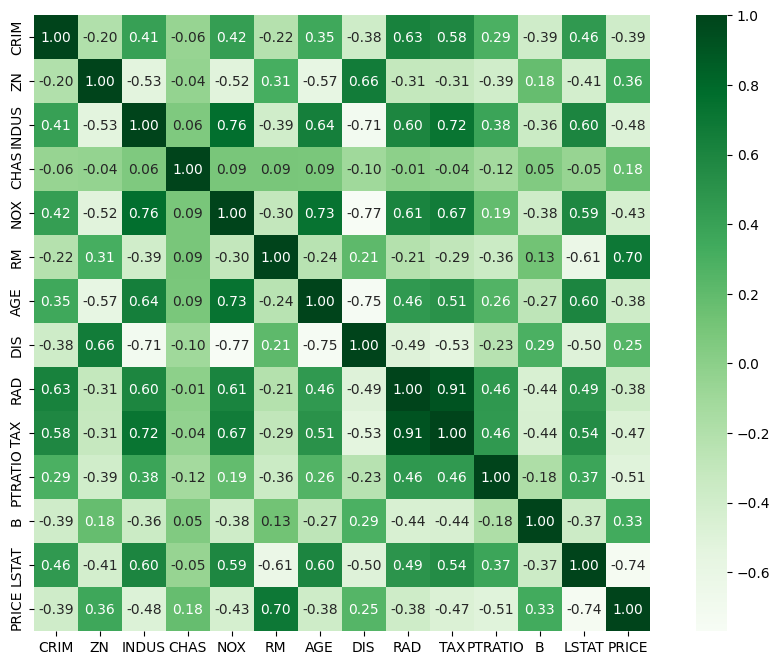

In [10]:
# Plotting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),square=True,annot=True,fmt=".2f",cmap='Greens')
plt.show()

    Price and LSTAT are highly negatively correlated
    RM and Price are highly positively correlated

#### Viewing some correlation betweem some features

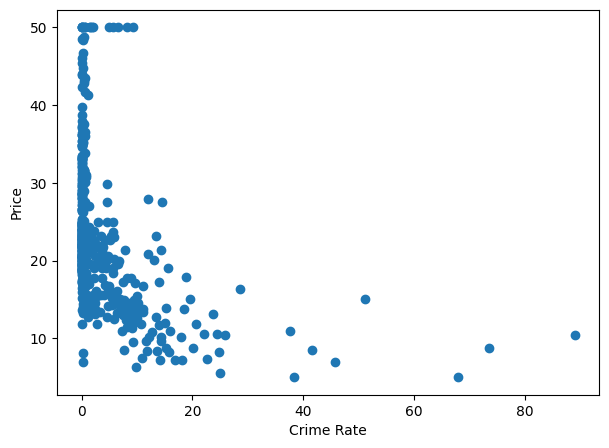

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(df['CRIM'],df['PRICE'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()

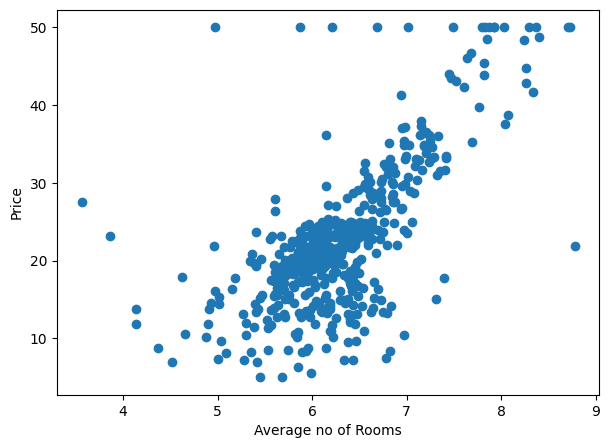

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(df['RM'],df['PRICE'])
plt.xlabel('Average no of Rooms')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='RM', ylabel='PRICE'>

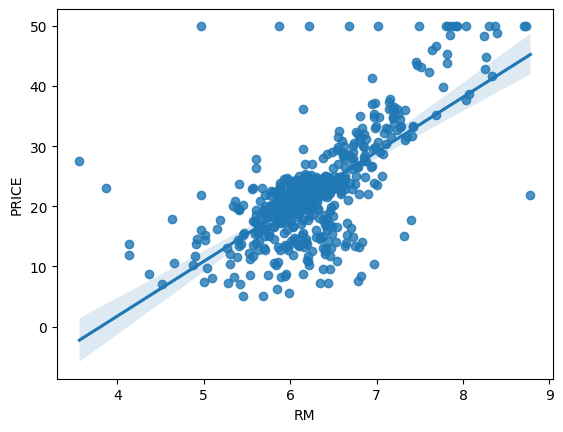

In [13]:
sns.regplot(data=df,x=df['RM'],y=df['PRICE'])

<Axes: xlabel='LSTAT', ylabel='PRICE'>

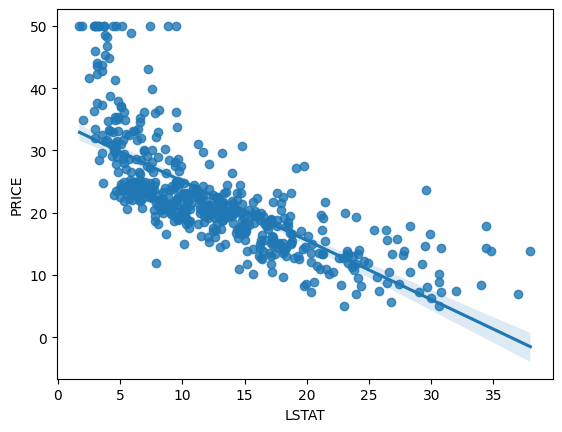

In [14]:
sns.regplot(data=df,x=df['LSTAT'],y=df['PRICE'])

<Axes: xlabel='CHAS', ylabel='PRICE'>

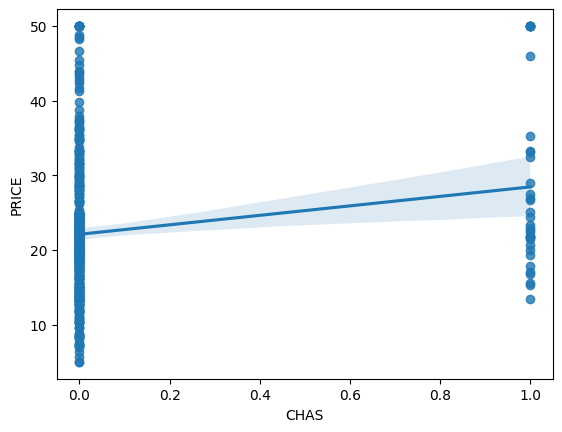

In [15]:
sns.regplot(data=df,x=df['CHAS'],y=df['PRICE'])

### Independent and Dependent features

In [16]:
# Splitting the data into dependent and independent variables
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [19]:
# Train Test split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


In [21]:
# checking the shape of the train and test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [22]:
X_train_woscaling = X_train.copy()
X_test_woscaling = X_test.copy()
y_train_woscaling = y_train.copy()
y_test_woscaling = y_test.copy()

### Model training without scaling

In [23]:
# Create a Linear regressor
linearRwoS = LinearRegression()

In [24]:
# Train the model using the training sets 
linearRwoS.fit(X_train_woscaling, y_train_woscaling)

LinearRegression()

In [25]:
# Value of y intercept
linearRwoS.intercept_

31.631084035693547

In [26]:
#Converting the coefficient values to a dataframe
coefficentswoS = pd.DataFrame([X_train_woscaling.columns, linearRwoS.coef_]).T
coefficentswoS = coefficentswoS.rename(columns={0:"Attribute", 1:"Coefficients"})
coefficentswoS

,Attribute,Coefficients
0,CRIM,-0.13347
1,ZN,0.035809
2,INDUS,0.049523
3,CHAS,3.119835
4,NOX,-15.417061
5,RM,4.057199
6,AGE,-0.010821
7,DIS,-1.385998
8,RAD,0.242727
9,TAX,-0.008702


#### Model evaluation w/o scaling

In [27]:
# Model prediction on train data
y_train_wo_pred = linearRwoS.predict(X_train_woscaling)

In [28]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train_woscaling, y_train_wo_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train_woscaling, y_train_wo_pred))*
      (len(y_train_woscaling)-1)/(len(y_train_woscaling)-X_train_woscaling.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train_woscaling, y_train_wo_pred))
print('MSE:',metrics.mean_squared_error(y_train_woscaling, y_train_wo_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train_woscaling, y_train_wo_pred)))

R^2: 0.7434997532004697
Adjusted R^2: 0.7336923908228405
MAE: 3.3568267821682105
MSE: 22.545481487421423
RMSE: 4.748208239685937


In [29]:
X = sm.add_constant(X_train_woscaling)

In [30]:
model = OLS(y_train_woscaling,X).fit()

In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Fri, 24 May 2024   Prob (F-statistic):           4.96e-92
Time:                        10:59:13   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

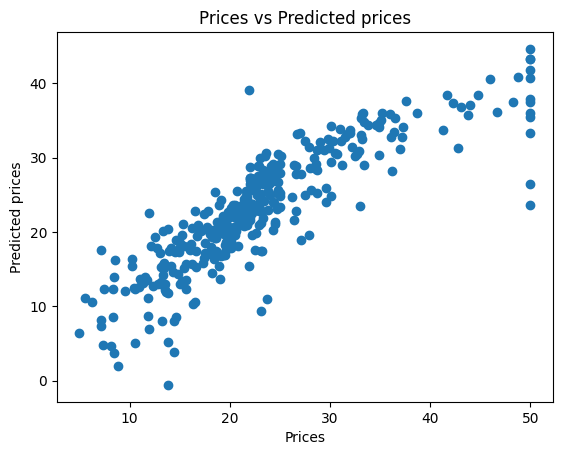

In [32]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train_woscaling, y_train_wo_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

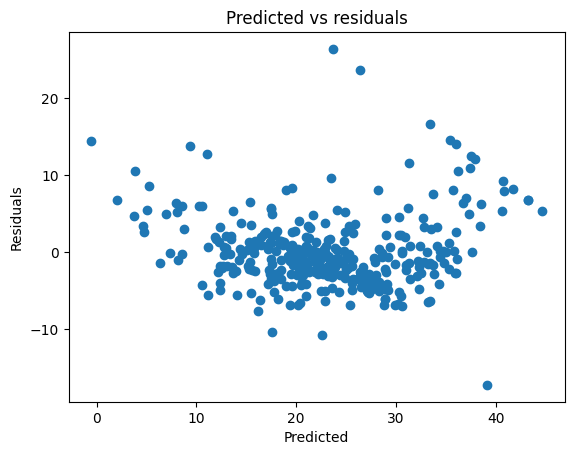

In [33]:
# Checking residuals
plt.scatter(y_train_wo_pred, y_train_woscaling - y_train_wo_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

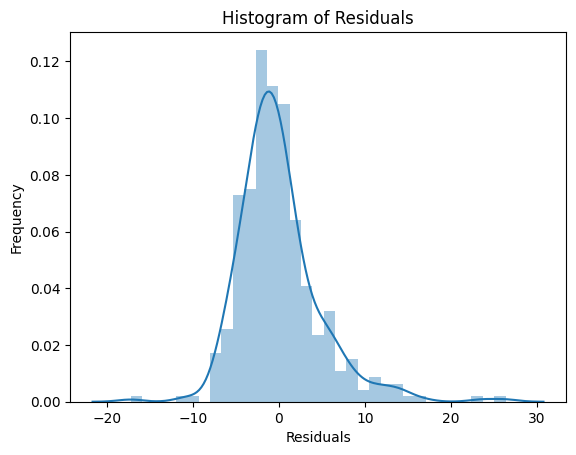

In [34]:
# Checking Normality of errors
sns.distplot(y_train_woscaling - y_train_wo_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

In [35]:
y_test_wo_pred = linearRwoS.predict(X_test_woscaling)

In [36]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test_woscaling, y_test_wo_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test_woscaling, y_test_wo_pred))*
      (len(y_test_woscaling)-1)/(len(y_test_woscaling)-X_test_woscaling.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test_woscaling, y_test_wo_pred))
print('MSE:',metrics.mean_squared_error(y_test_woscaling, y_test_wo_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_woscaling, y_test_wo_pred)))

R^2: 0.7112260057484925
Adjusted R^2: 0.6840226584639302
MAE: 3.1627098714574147
MSE: 21.51744423117727
RMSE: 4.638689926172827


#### Interpretation:
###### R² (Coefficient of Determination):

    Train R²: 0.7435 and Test R²: 0.7112 indicate that the model explains around 74.35% of the variance in the training data and 71.12% of the variance in the test data. This suggests a strong fit, as both values are relatively high. The slight decrease from the training R² to the test R² is expected and indicates that the model generalizes well to unseen data, as the drop is not substantial.

###### Adjusted R²:

    Train Adjusted R²: 0.7337 and Test Adjusted R²: 0.6840 are slightly lower than the respective R² values. This is normal because Adjusted R² accounts for the number of predictors in the model, penalizing more complex models. The decrease from the training to the test set is consistent with the slight drop in R² and further indicates that the model generalizes reasonably well.

###### MAE (Mean Absolute Error):

    Train MAE: 3.3568 and Test MAE: 3.1627 show that, on average, the model's predictions are off by about 3.36 units in the training data and 3.16 units in the test data. The similarity in MAE between the training and test sets suggests that the model performs consistently across both datasets.

###### MSE (Mean Squared Error):

     Train MSE: 22.5455 and Test MSE: 21.5174 provide a measure of the average squared difference between the observed and predicted values. As with MAE, the close values indicate consistent performance between training and testing datasets.

###### RMSE (Root Mean Squared Error):

    Train RMSE: 4.7482 and Test RMSE: 4.6387 are the square roots of MSE and provide a measure of the typical size of the prediction errors. Again, the close values indicate that the model's prediction error is stable across training and test datasets.

###### Overall Insights:
    The model shows a strong fit to the training data and generalizes well to the test data.
    There is no evidence of overfitting, as the performance metrics (R², Adjusted R², MAE, MSE, RMSE) are similar for both the training and test datasets.
    The high R² and Adjusted R² values indicate that the model explains a large portion of the variance in the data.
    The relatively low MAE, MSE, and RMSE values suggest that the model's predictions are quite accurate.

### Scaling transformation

In [37]:
X_trainS = X_train.copy()
X_testS = X_test.copy()
y_trainS = y_train.copy()
y_testS = y_test.copy()

In [38]:
# Standardize the dataset as dataset 
scaler=StandardScaler()

In [39]:
X_trainS=scaler.fit_transform(X_trainS)

In [40]:
X_testS=scaler.transform(X_testS)

In [41]:
pickle.dump(scaler,open('scaling.pkl','wb'))

### Model training by doing scaler transformation

In [42]:
lr=LinearRegression()

In [43]:
lr.fit(X_trainS,y_trainS)

LinearRegression()

In [44]:
# value of intercept
lr.intercept_

23.01581920903955

In [45]:
lr.coef_

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [46]:
#Converting the coefficient values to a dataframe
coefficents = pd.DataFrame([X_train.columns, lr.coef_]).T
coefficents = coefficents.rename(columns={0:"Attribute", 1:"Coefficients"})
coefficents

,Attribute,Coefficients
0,CRIM,-1.108346
1,ZN,0.80844
2,INDUS,0.343135
3,CHAS,0.813864
4,NOX,-1.798043
5,RM,2.913858
6,AGE,-0.298939
7,DIS,-2.942511
8,RAD,2.094193
9,TAX,-1.447067


In [47]:
# Model prediction on train data
y_trainS_pred = lr.predict(X_trainS)

In [48]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_trainS, y_trainS_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_trainS, y_trainS_pred))*
      (len(y_trainS)-1)/(len(y_trainS)-X_trainS.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_trainS, y_trainS_pred))
print('MSE:',metrics.mean_squared_error(y_trainS, y_trainS_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_trainS, y_trainS_pred)))

R^2: 0.7434997532004697
Adjusted R^2: 0.7336923908228405
MAE: 3.3568267821682056
MSE: 22.545481487421423
RMSE: 4.748208239685937


In [49]:
X = sm.add_constant(X_trainS)

In [50]:
model = OLS(y_trainS,X).fit()

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Fri, 24 May 2024   Prob (F-statistic):           4.96e-92
Time:                        10:59:21   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0158      0.258     89.379      0.0

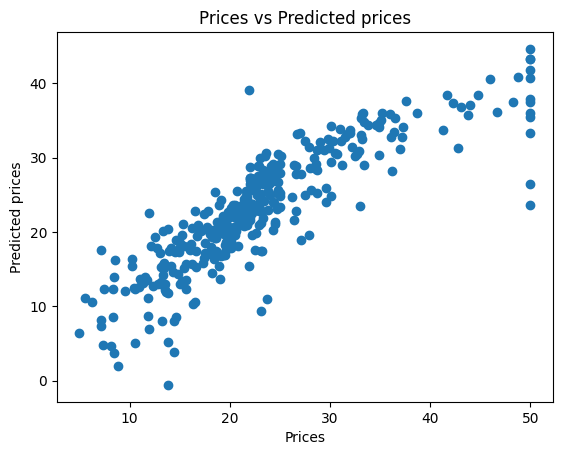

In [52]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_trainS, y_trainS_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

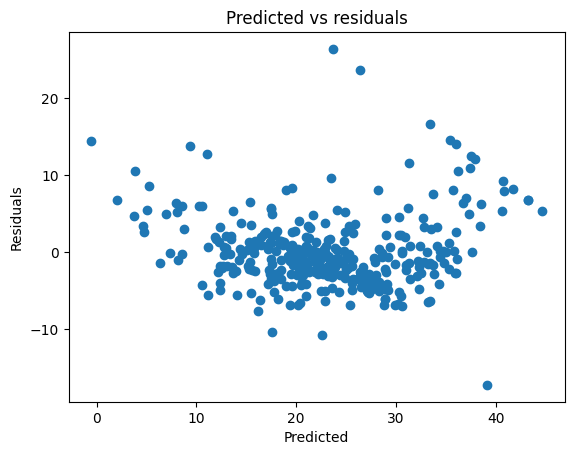

In [53]:
# Checking residuals
plt.scatter(y_trainS_pred, y_trainS - y_trainS_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

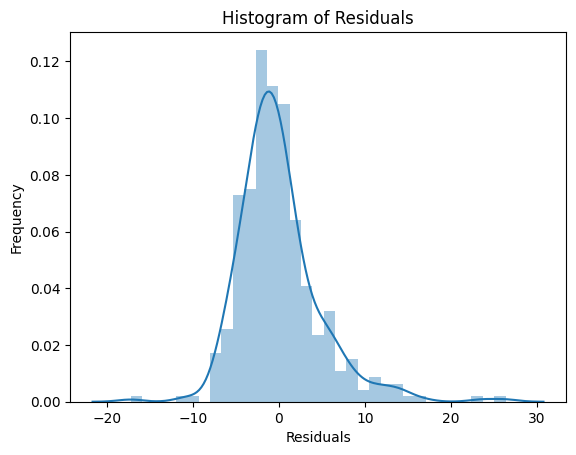

In [54]:
# Checking Normality of errors
sns.distplot(y_trainS - y_trainS_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

In [55]:
y_testS_pred = lr.predict(X_testS)

In [56]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_testS, y_testS_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_testS, y_testS_pred))*
      (len(y_testS)-1)/(len(y_testS)-X_testS.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_testS, y_testS_pred))
print('MSE:',metrics.mean_squared_error(y_testS, y_testS_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_testS, y_testS_pred)))

R^2: 0.7112260057484932
Adjusted R^2: 0.6840226584639308
MAE: 3.162709871457406
MSE: 21.51744423117721
RMSE: 4.6386899261728205


#### Interpretation:
###### R² (Coefficient of Determination):

    Train R²: 0.7435 and Test R²: 0.7112 suggest that the model explains approximately 74.35% of the variance in the training data and 71.12% of the variance in the test data. This indicates a strong fit, with the model performing well on both the training and test sets. The slight decrease in R² from the training to the test set is expected and indicates that the model generalizes well to unseen data.

###### Adjusted R²:

    Train Adjusted R²: 0.7337 and Test Adjusted R²: 0.6840 account for the number of predictors in the model. The values are slightly lower than the respective R² values, which is typical, as Adjusted R² penalizes the addition of irrelevant predictors. The consistent drop from training to test data is expected and indicates that the model's complexity is appropriate for the data.

###### MAE (Mean Absolute Error):

    Train MAE: 3.3568 and Test MAE: 3.1627 indicate that, on average, the model's predictions deviate by approximately 3.36 units from the actual values in the training data and 3.16 units in the test data. The similar MAE values for both datasets suggest that the model's predictions are consistently accurate across the training and test sets.

###### MSE (Mean Squared Error):

    Train MSE: 22.5455 and Test MSE: 21.5174 provide a measure of the average squared difference between predicted and actual values. The close values for MSE in both datasets reinforce the observation that the model performs consistently.

###### RMSE (Root Mean Squared Error):

    Train RMSE: 4.7482 and Test RMSE: 4.6387 are the square roots of the MSE, giving an indication of the average magnitude of the prediction errors. The similarity in RMSE values between training and test sets indicates stable model performance.


#### Deriving Insights:

###### Model Performance:
    The high R² values for both training and test datasets demonstrate that the linear regression model explains a substantial portion of the variance in the data.
    The minimal difference between training and test performance metrics (R², Adjusted R², MAE, MSE, RMSE) indicates that the model generalizes well and is not overfitting.

###### Consistency and Reliability:
    The consistent performance metrics across training and test sets suggest that the model is reliable and its predictions are robust.

###### Feature Scaling Impact:
    Scaling the features has maintained the model's performance, as evidenced by the similarity in metrics before and after scaling. This is expected for linear regression, as it is not inherently sensitive to feature scaling. However, scaling can be important for improving the convergence and interpretability of models, especially when using gradient-based optimization techniques.

## Conclusion:

###### Consistency of Metrics:
    The metrics (R², Adjusted R², MAE, MSE, RMSE) are identical before and after scaling for both the training and test datasets. This suggests that scaling the features did not affect the performance of the linear regression model.

###### Linear Regression and Scaling:
    For linear regression models, scaling features typically does not impact the performance metrics because the model inherently handles linear relationships regardless of the scale of the features. However, scaling can be beneficial for numerical stability and interpretability, especially when using algorithms that rely on gradient-based optimization.

#### Potential Next Steps:

###### Verification with Larger Dataset:
    Ensure that the consistency observed is not due to the small size of the example dataset used. Validate this conclusion with a larger dataset.

###### Exploration with Other Models:
    While scaling might not impact linear regression, it is crucial for other types of models, such as those using gradient descent (e.g., logistic regression, neural networks) or distance-based algorithms (e.g., k-nearest neighbors, SVMs).

###### Cross-Validation:
    Perform cross-validation to further confirm the robustness of the model and ensure that the observed metrics are consistent across different data splits.

###### Assumption Checks:
    Verify that all assumptions of linear regression are satisfied (linearity, independence, homoscedasticity, and normality of residuals). Address any violations if found.

### New Data Prediction

In [57]:
newDataPred=np.array(list(df.iloc[0,:-1]))

In [58]:
newDataPred.reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [59]:
lr.predict(scaler.transform(newDataPred.reshape(1,-1)))

array([30.08649576])

### Picking the model file for deployment

In [60]:
import pickle

In [61]:
pickle.dump(lr,open('regmodel.pkl','wb'))

In [62]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [63]:
# Prediction
pickled_model.predict(scaler.transform(newDataPred.reshape(1,-1)))

array([30.08649576])

# End